In [1]:
import geopandas
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load LA neighborhood geo data
geojson_file_loc = "data/mapping-la-data-main/geojson/la-county-neighborhoods-v6.geojson"
geo_la_neighborhood = geopandas.read_file(geojson_file_loc)
# LA EPSG transformation
# geo_la_neighborhood = geo_la_neighborhood.to_crs('EPSG:3395')
geo_la_neighborhood["area"] = geo_la_neighborhood.area
geo_la_neighborhood['boundary'] = geo_la_neighborhood.boundary
geo_la_neighborhood['centroid'] = geo_la_neighborhood.centroid
# load LA neighborhood poplulation data
pop_la_neighborhood = pd.read_csv('data/la-neighborhood-population.csv')
# merge two dataframe together
df = geo_la_neighborhood.merge(pop_la_neighborhood, left_on='name', right_on='Neighborhood', how='inner')
del df['Neighborhood']
del df['kind']
del df['external_id']
del df['slug']
del df['set']
del df['metadata']
del df['resource_uri']
df = df.rename(columns={'Population per Sqmi':'pop_density'})

C:\Users\mcran\AppData\Local\Temp\ipykernel_4788\1842084680.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_la_neighborhood["area"] = geo_la_neighborhood.area
C:\Users\mcran\AppData\Local\Temp\ipykernel_4788\1842084680.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_la_neighborhood['centroid'] = geo_la_neighborhood.centroid


In [3]:
# load LA existing vertiport data
df_heliport = pd.read_csv('data/us-heliports-landing-facilities.csv')
del df_heliport['State_Name']
del df_heliport['Facility_Type']
del df_heliport['County_s_State_Post_Office_Code']
df_airport = pd.read_csv('data/us-general-aviation-airports.csv')
del df_airport['County_s_State_Post_Office_Code']
del df_airport['State_Name']
df_vertiport = pd.concat([df_heliport, df_airport])
mask = (df_vertiport['SHAPE_X'] <-117.6) & (df_vertiport['SHAPE_X'] > -119) & (df_vertiport['SHAPE_Y'] <34.8) & (df_vertiport['SHAPE_Y'] > 33.6)
df_vertiport_la = df_vertiport[mask]

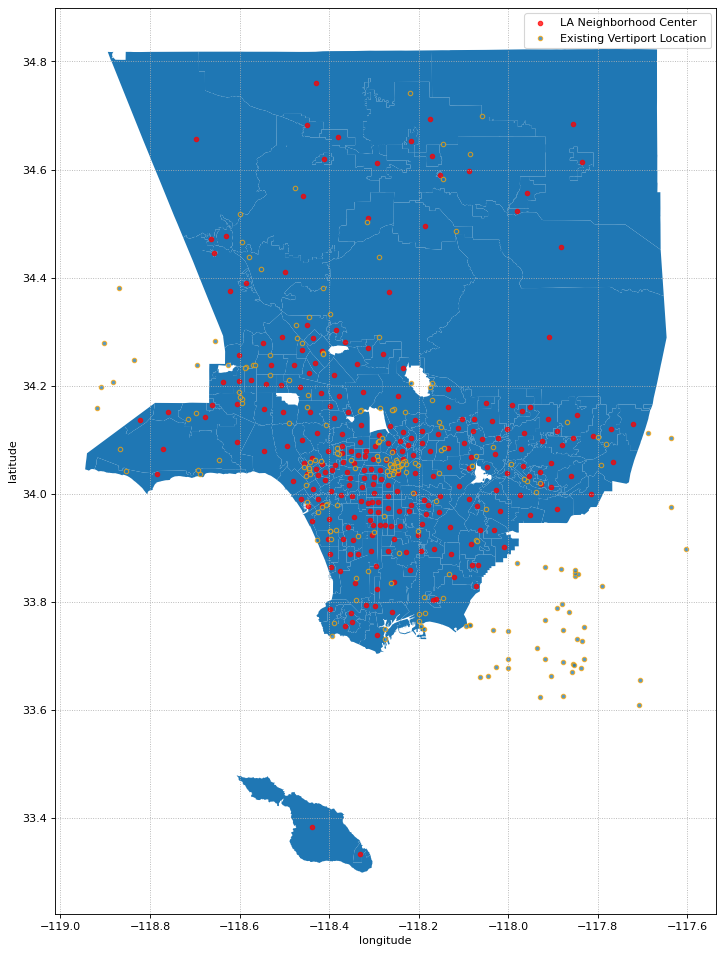

In [4]:

fig, ax = plt.subplots(figsize=(15,15), dpi=80)
df.plot(ax=ax, label='LA Neighborhood')
c = geopandas.GeoDataFrame(df, geometry=df['centroid'])
c.plot(ax=ax, color='red',alpha=0.75, markersize=16, label='LA Neighborhood Center')
ax.scatter(df_vertiport_la['SHAPE_X'], df_vertiport_la['SHAPE_Y'], s=16, edgecolors='orange', alpha=0.75, label='Existing Vertiport Location')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.legend()
ax.grid(linestyle=':')